<a href="https://colab.research.google.com/github/raihanfathulb/Word-Cloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAIHAN FATHUL BAYAN - 1301213272

Wordcloud Komentar Timnas Sepak Bola Indonesia di Era Shin Tae-Yong



In [ ]:
#Imports the warnings module and uses filterwarnings to ignore potential warnings during execution.
import warnings
warnings.filterwarnings("ignore")

#Library
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt

#Imports libraries for text processing and WordCloud creation.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Connect with drive
from google.colab import drive

%cd /content/drive/MyDrive/TimnasDataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TimnasDataset


In [ ]:
#Read data
df = pd.read_csv("Timnas.csv")
df

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,Naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


In [ ]:
#Remove '<username>' in dataset komentar
df['komentar'] = df['komentar'].str.replace('<username>','')
#Drop column label
df = df.drop(columns=['label'])

In [ ]:
df

,komentar
0,Simulasi indonesia kembali dijajah keturunan ...
1,keturunan lain yang gak main bola emang bis...
2,"uda botak keturunan penjajah, sok si paling ..."
3,"Belum tentu, gak semuanya jadi pemain bola...."
4,Lu nya aja yg bego. Makanya nonton sendiri ...
...,...
393,3 tahun lalu indonesia memang ga gencar buat...
394,\
395,Naturalisasi pemain keturunan menjadi langkah ...
396,semua persyaratan yang diperlukan untuk proses...


In [ ]:
#selecting row 0 - 200
df = df.iloc[:201]
df

,komentar
0,Simulasi indonesia kembali dijajah keturunan ...
1,keturunan lain yang gak main bola emang bis...
2,"uda botak keturunan penjajah, sok si paling ..."
3,"Belum tentu, gak semuanya jadi pemain bola...."
4,Lu nya aja yg bego. Makanya nonton sendiri ...
...,...
196,Suka tidak suka Coach STY lah yang berhasil m...
197,Yang paling kerja keras tinggi menurut sty it...
198,Salah satu alasan juga knp klub2 korea ttp n...
199,"Tolonglah, sty ngelath dri rank 170an, dan t..."


In [ ]:
#creates a new column named "tokens" in the DataFrame df
#and populates it with tokenized words from the "komentar" column.
df['tokens'] = df['komentar'].apply(word_tokenize)
df

,komentar,tokens
0,Simulasi indonesia kembali dijajah keturunan ...,"[Simulasi, indonesia, kembali, dijajah, keturu..."
1,keturunan lain yang gak main bola emang bis...,"[keturunan, lain, yang, gak, main, bola, emang..."
2,"uda botak keturunan penjajah, sok si paling ...","[uda, botak, keturunan, penjajah, ,, sok, si, ..."
3,"Belum tentu, gak semuanya jadi pemain bola....","[Belum, tentu, ,, gak, semuanya, jadi, pemain,..."
4,Lu nya aja yg bego. Makanya nonton sendiri ...,"[Lu, nya, aja, yg, bego, ., Makanya, nonton, s..."
...,...,...
196,Suka tidak suka Coach STY lah yang berhasil m...,"[Suka, tidak, suka, Coach, STY, lah, yang, ber..."
197,Yang paling kerja keras tinggi menurut sty it...,"[Yang, paling, kerja, keras, tinggi, menurut, ..."
198,Salah satu alasan juga knp klub2 korea ttp n...,"[Salah, satu, alasan, juga, knp, klub2, korea,..."
199,"Tolonglah, sty ngelath dri rank 170an, dan t...","[Tolonglah, ,, sty, ngelath, dri, rank, 170an,..."


In [ ]:
# Menghilangkan stop words dari token-token
stop_words = set(stopwords.words('indonesian'))
stop_words.update(['ya', 'ga', 'kalo', 'maju', 'gw', 'ampe', 'bgt', 'bye', 'taun', 'si', 'lu', 'doang', 'bnyak',
               'siap2', 'gk', 'mah', 's', 'nih', 'oke', 'sok', 'warganet', 'ok', 'aih', 'un', 'ni', 'biar', 'sm', 'a', 'vs',
               'keknya', 'gak', ',',  'uda', 'yg', 'nya', 'aja', 'gitu', 'dr', 'klo', 'deh', 'tpi', 'thn', 'sih', 'skrg', 'dgn', 'krn', 'https', 'kali', 'bro', 'udah', 'bener', 'gua', 'eh', 'milih', 'bek', '' 'mas', 'liat', 'gimana', 'tp', 'tuh', 'dah', 'mulu', 'udh', 'lo', 'ma', 'fix', 'sempet'])
#print(stop_words)
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df

,komentar,tokens
0,Simulasi indonesia kembali dijajah keturunan ...,"[Simulasi, indonesia, dijajah, keturunan, bela..."
1,keturunan lain yang gak main bola emang bis...,"[keturunan, main, bola, emang, naturalisasi, i..."
2,"uda botak keturunan penjajah, sok si paling ...","[botak, keturunan, penjajah, paham, bola, ., C..."
3,"Belum tentu, gak semuanya jadi pemain bola....","[pemain, bola, ., karir, pemain, bola, kualita..."
4,Lu nya aja yg bego. Makanya nonton sendiri ...,"[bego, ., nonton, tolol, ., Persepsi, orang, b..."
...,...,...
196,Suka tidak suka Coach STY lah yang berhasil m...,"[Suka, suka, Coach, STY, berhasil, membawa, ga..."
197,Yang paling kerja keras tinggi menurut sty it...,"[kerja, keras, sty, lokal, 2, pemain, .., asna..."
198,Salah satu alasan juga knp klub2 korea ttp n...,"[Salah, alasan, knp, klub2, korea, ttp, ngelir..."
199,"Tolonglah, sty ngelath dri rank 170an, dan t...","[Tolonglah, sty, ngelath, dri, rank, 170an, te..."


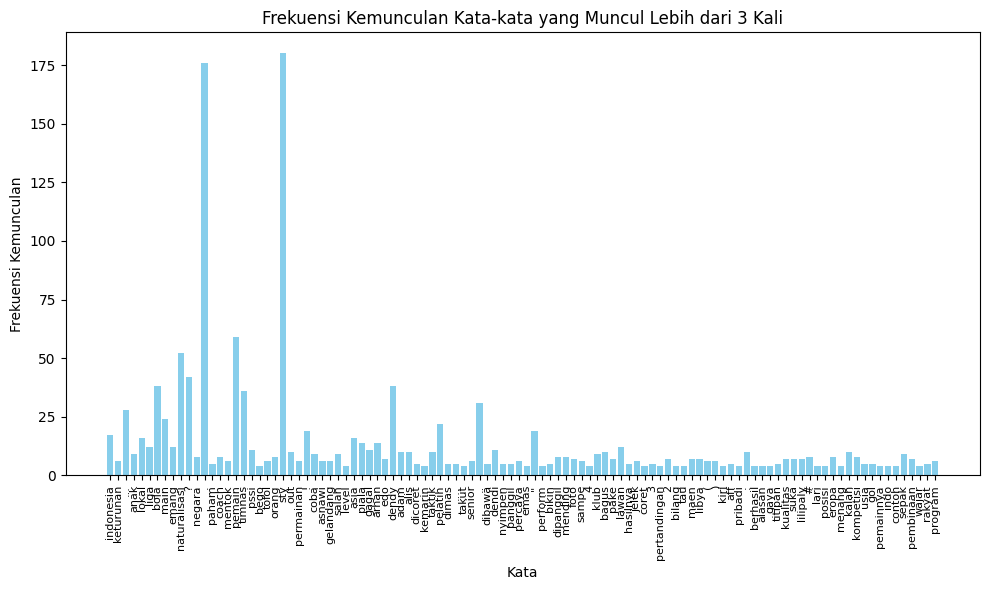

In [ ]:
# Menghitung frekuensi kemunculan kata-kata
word_freq = {}
for tokens in df['tokens']:
    for token in tokens:
        if token.lower() in word_freq:
            word_freq[token.lower()] += 1
        else:
            word_freq[token.lower()] = 1
# Memilih kata-kata yang muncul lebih dari 5 kali
filtered_words = [word for word in word_freq.keys() if word_freq[word] > 3]
words = filtered_words
freqs = [word_freq[word] for word in filtered_words]

plt.figure(figsize=(10, 6))
plt.bar(words, freqs, color='skyblue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi Kemunculan')
plt.title('Frekuensi Kemunculan Kata-kata yang Muncul Lebih dari 3 Kali')
plt.xticks(rotation=90, fontsize=8)  # Rotasi label sumbu x agar lebih mudah dibaca
plt.tight_layout()
plt.show()

In [ ]:
#membuat list baru dengan token
all_words = [word for tokens in df['tokens'] for word in tokens if word in filtered_words]
#membuat objek wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(all_words))

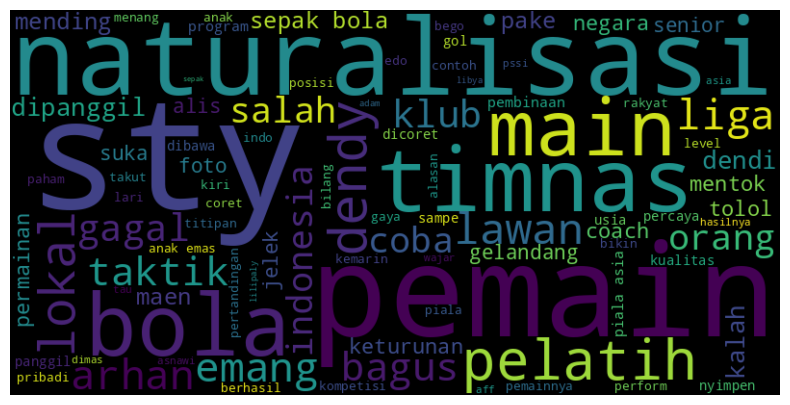

In [ ]:
#menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!ls

sty.png  Timnas.csv  twitter.png  twt.jpg


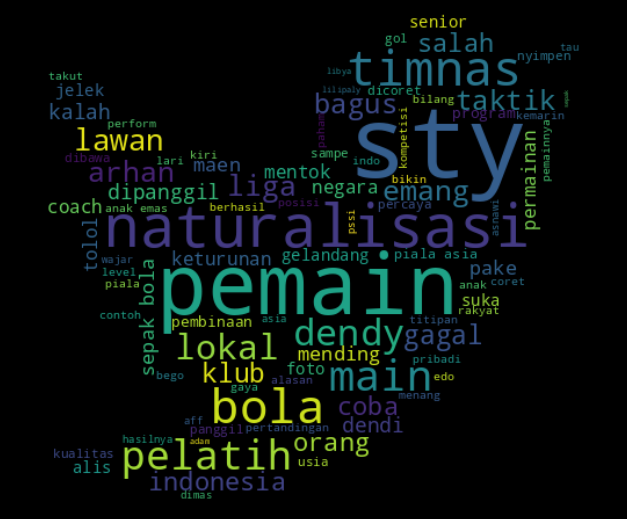

In [ ]:
#Menampilkan wordcloud dengan menggunakan mask
from PIL import Image

image = Image.open('twt.jpg')
mask = np.array(image)
mask[mask < 128] = 0  # Sesuaikan threshold untuk transparansi
mask[mask >= 128] = 255
# Check if mask has shape attribute (optional)
if not hasattr(mask, 'shape'):
    print("Error: Mask might not have the expected format. Check code.")
    exit()
wordcloud = WordCloud(width=800, height=400, mask=mask, background_color="black").generate(' '.join(all_words))

plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
wordcloud.to_file("first_wc.png")